In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import pickle

In [2]:
df = pd.read_csv("telecom_churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pd.set_option("display.max_columns",None)


In [12]:
df=df.drop(columns=['customerID'])

In [14]:

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique)
        print("-"*50)

gender <bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object>
--------------------------------------------------
SeniorCitizen <bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64>
--------------------------------------------------
Partner <bound method Series.unique of 0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object>
--------------------------------------------------
Dependents <bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: De

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df[df["TotalCharges"]=='']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:

len(df[df["TotalCharges"]==" "])

11

In [22]:

df["TotalCharges"] = df["TotalCharges"].replace({" " : "0.0"})

In [25]:

df["TotalCharges"] = df["TotalCharges"].astype(float)

In [27]:

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [34]:
def plot_histogram(df, column_name):
    
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")

    plt.legend()

    plt.show()

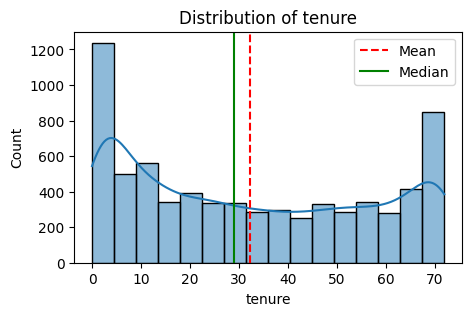

In [36]:

plot_histogram(df, "tenure")

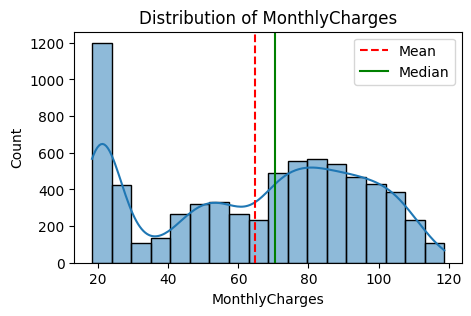

In [38]:
plot_histogram(df, "MonthlyCharges")

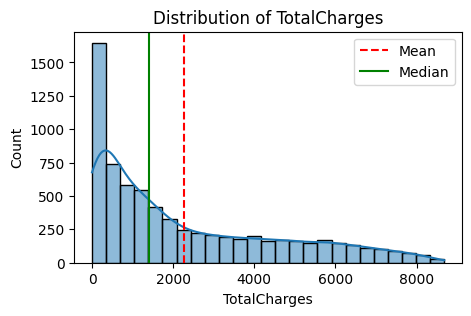

In [40]:

plot_histogram(df, "TotalCharges")

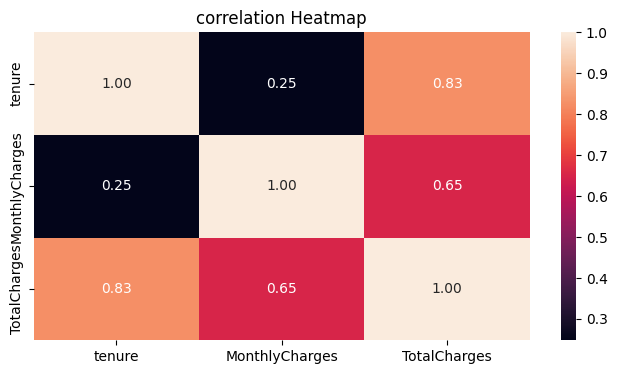

In [44]:

plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, fmt=".2f")
plt.title("correlation Heatmap")
plt.show()

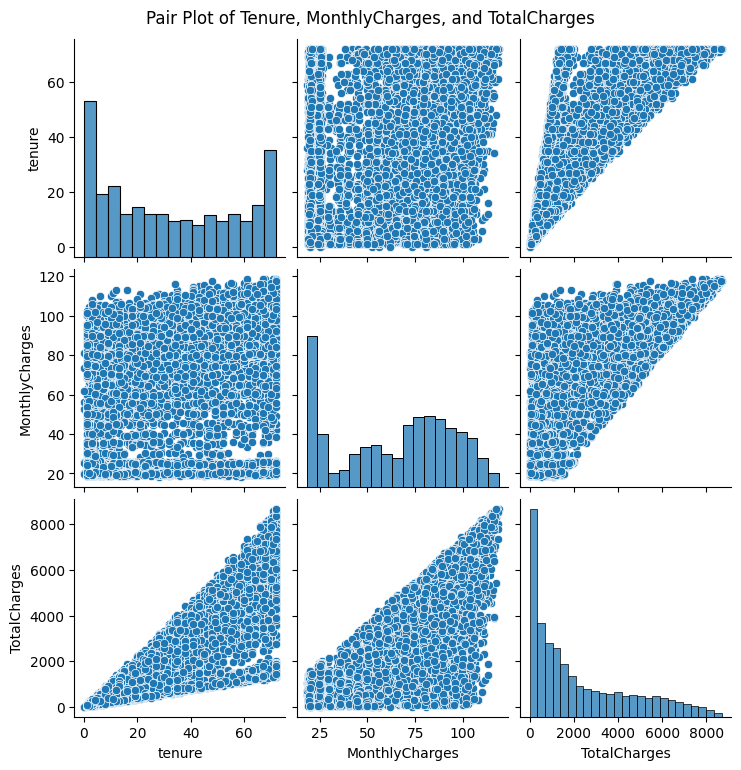

In [109]:

# Create pairplot
sns.pairplot(df[["tenure", "MonthlyCharges", "TotalCharges"]])
plt.suptitle("Pair Plot of Tenure, MonthlyCharges, and TotalCharges", y=1.02)
plt.show()


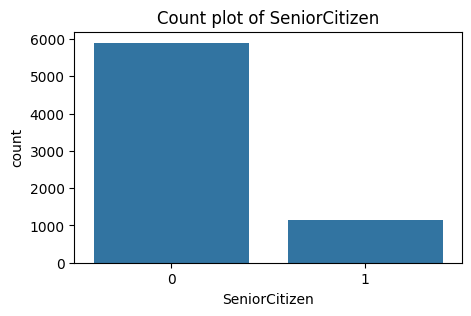

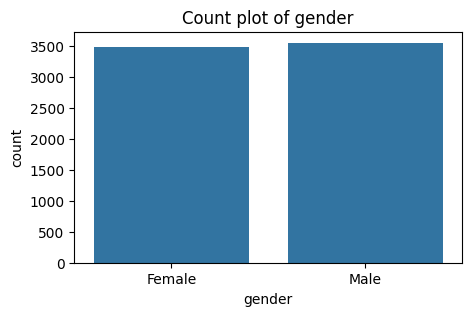

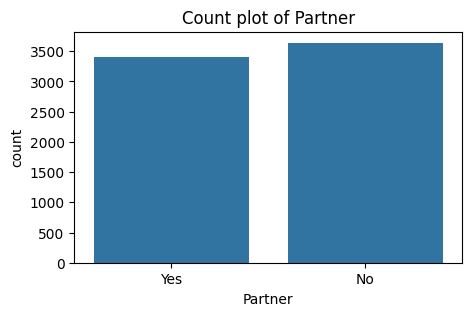

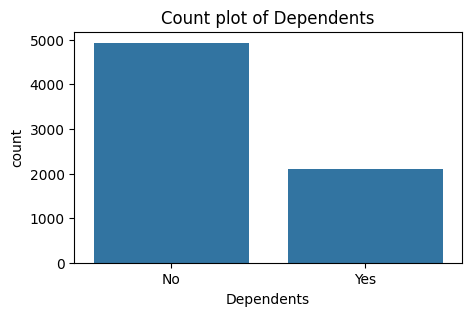

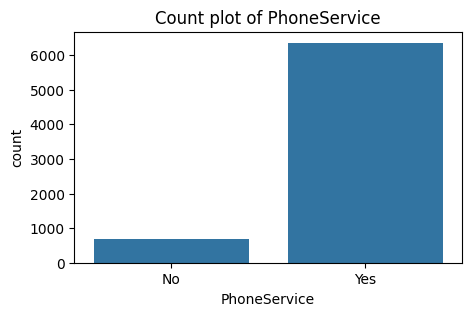

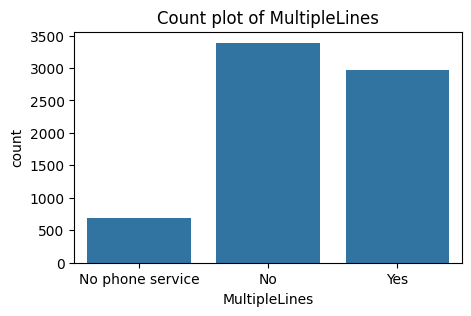

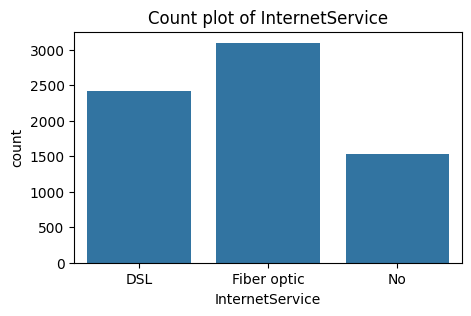

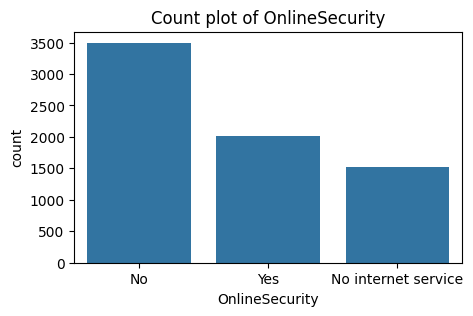

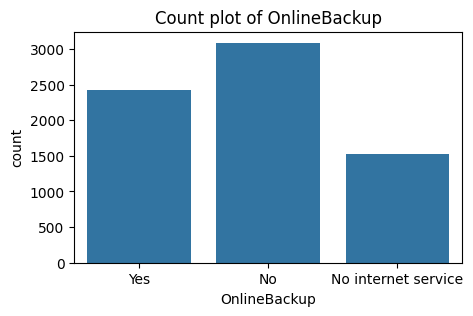

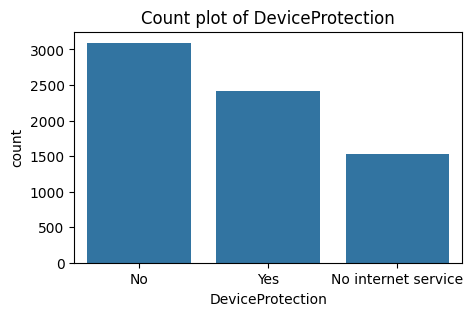

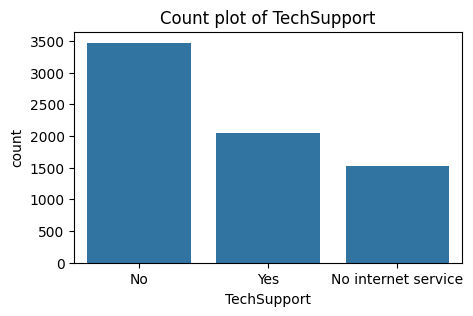

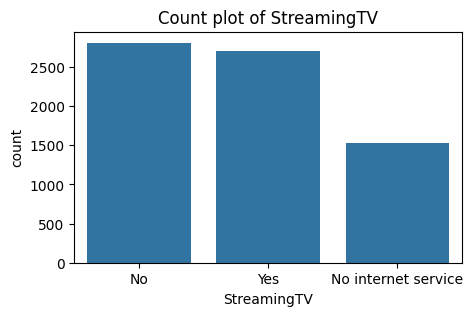

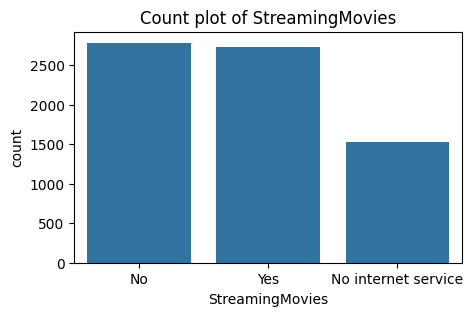

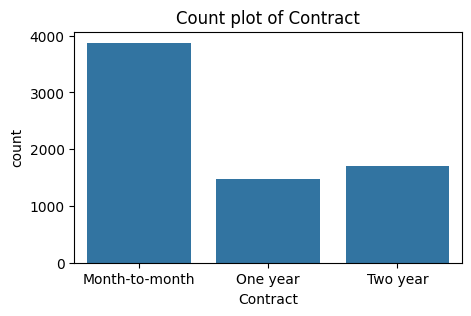

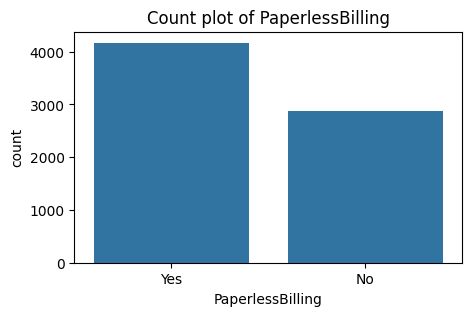

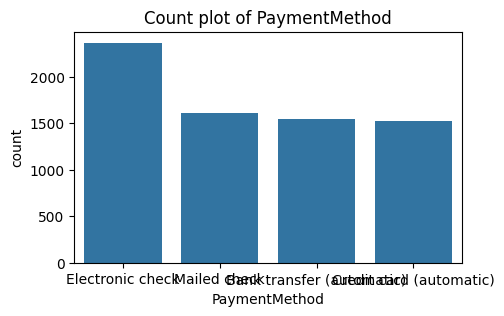

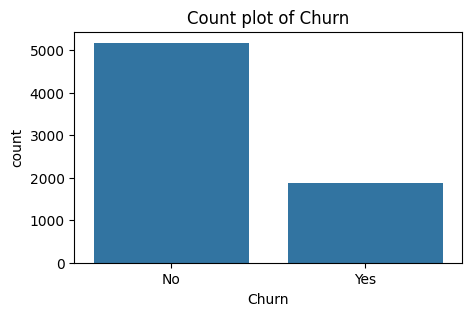

In [46]:

object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

In [48]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

C:\Users\khushi sharma\AppData\Local\Temp\ipykernel_17588\3368294369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [51]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [55]:

#idetifying columns with object data types

object_columns = df.select_dtypes(include="object").columns

In [57]:

encoders = {}

#applying label encoding and store the encoders

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

#save the encoder to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [59]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [61]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [63]:

x = df.drop(columns=["Churn"])
y = df["Churn"]

In [66]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
smote = SMOTE(random_state=42)

In [70]:

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

C:\Users\khushi sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [72]:

print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [78]:
#Model training
#dictionary models

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [80]:
#dictionary to store the cross validation results

cv_scores = {}

#perform 5-fold cross validation for each model

for model_name, model in models.items():
    print(f"Training{model_name} with default parameters")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*80)

TrainingDecision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
--------------------------------------------------------------------------------
TrainingRandom Forest with default parameters
Random Forest cross-validation accuracy: 0.84
--------------------------------------------------------------------------------
TrainingXGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
--------------------------------------------------------------------------------


In [82]:
cv_scores

{'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [84]:

rfc = RandomForestClassifier(random_state=42)

In [87]:

rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [88]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [91]:

#Evaluate on test data

y_test_pred = rfc.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7771469127040455
Confusion Matrix:
 [[880 156]
 [158 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [94]:

#save the trained model as pickle file
model_data = {"model": rfc, "features_names": x.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [98]:

#load the saved model and the features name

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
features_names = model_data["features_names"]

In [101]:
loaded_model

RandomForestClassifier(random_state=42)

In [104]:
features_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [107]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

print(input_data_df.head())

#encode categorical features using the saved encoders
for column, encoder in encoders.items():
    input_data_df[column] = label_encoder.fit_transform(input_data_df[column])

#make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

#result
print("Prediction:{'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
[1]
Prediction:{'Churn' if prediction[0] == 1 else 'No Churn'}
Prediction Probability: [[0.37 0.63]]
